# CIFAR-10

##### Course: AP4064
##### Assignment: 1
##### Major: ATM
##### Name: Hugo ChunHo Lin
##### Student Id: 109601003

### Import the package and the dataset

In [1]:
import tensorflow as tf
from keras.datasets import cifar10
from keras import models
from keras import layers

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 2s 0us/step


### Define the DNN model architecture

In [2]:
def build_model():
    
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(32, 32, 3)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10)
    ])

    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    
    return model

### Visualize the data type and the label!

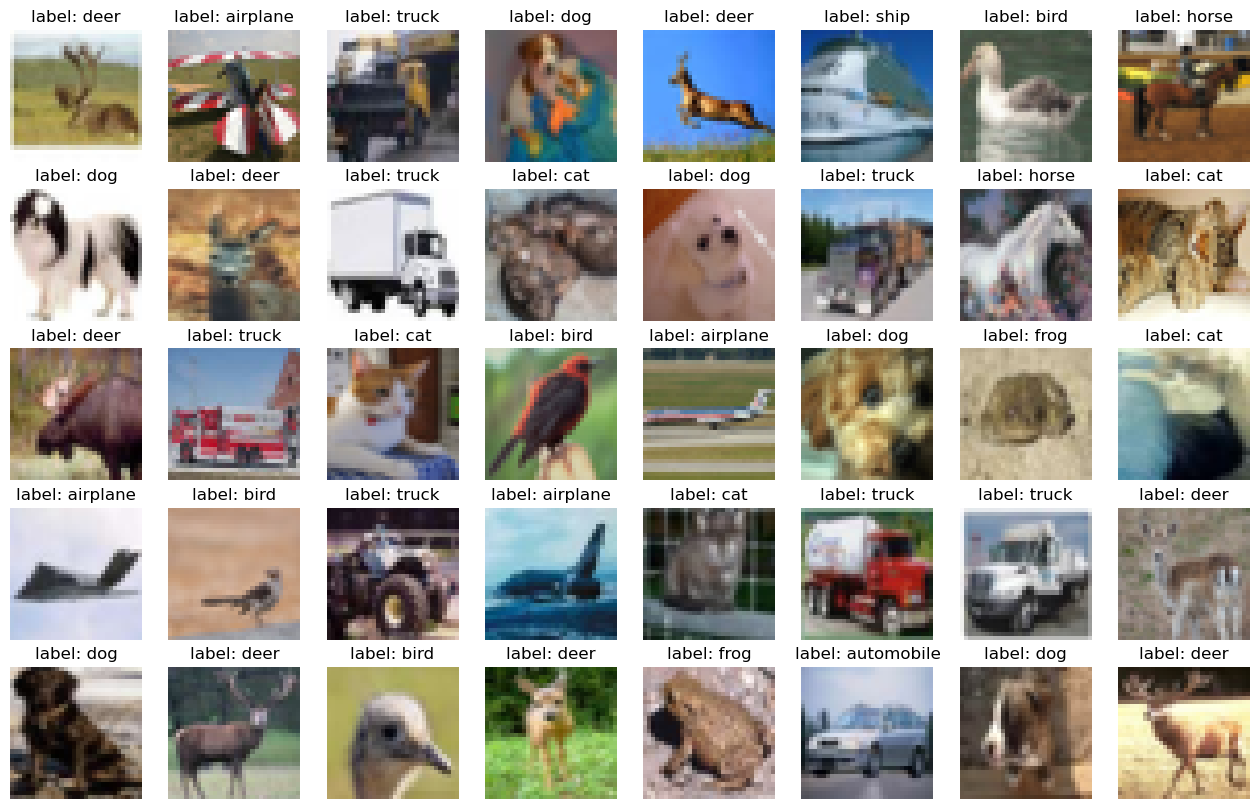

In [3]:
import matplotlib.pyplot as plt # pip install matplotlib
from random import randrange

text = ['airplane', 
        'automobile',
        'bird' ,
        'cat', 
        'deer', 
        'dog', 
        'frog', 
        'horse', 
        'ship', 
        'truck']
plt.figure(figsize=(16,10),facecolor='w')
for i in range(5):
  for j in range(8):
    index = randrange(0, 50000)
    plt.subplot(5, 8, i * 8 + j + 1)
    plt.title("label: {}".format(text[train_labels[index][0]]))
    plt.imshow(train_images[index])
    plt.axis('off')

plt.show()

In [4]:
model = build_model()

# Train the model
history = model.fit(
    train_images, 
    train_labels, 
    epochs=20, 
    validation_data=(test_images, test_labels)
)
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

Epoch 1/20
1563/1563 [==============================] - 12s 5ms/step - loss: 1.8928 - accuracy: 0.3069 - val_loss: 1.7890 - val_accuracy: 0.3490
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7785 - accuracy: 0.3548 - val_loss: 1.7352 - val_accuracy: 0.3648
Epoch 3/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.7454 - accuracy: 0.3654 - val_loss: 1.7371 - val_accuracy: 0.3650
Epoch 4/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.7236 - accuracy: 0.3782 - val_loss: 1.6908 - val_accuracy: 0.3804
Epoch 5/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.7088 - accuracy: 0.3810 - val_loss: 1.6907 - val_accuracy: 0.3877
Epoch 6/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6920 - accuracy: 0.3869 - val_loss: 1.6781 - val_accuracy: 0.3889
Epoch 7/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6859 - accuracy: 0.3897 - val_loss: 1.7010 - val_accuracy

In [5]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

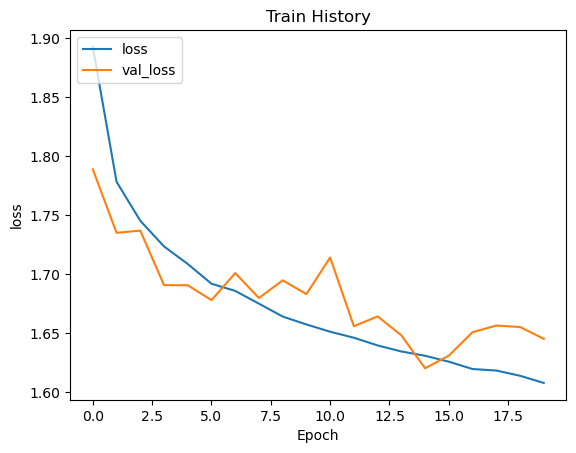

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

plt.title("Train History")
plt.ylabel("loss")
plt.xlabel("Epoch")

plt.legend(["loss", "val_loss"], loc = "upper left")
plt.show()

We find that about seven times, we can get the lowest `val_loss`, then we can re-compile our model again, and set the `epoches` to 14.

In [7]:
print('Test accuracy:', test_acc)

Test accuracy: 0.40779998898506165


### Test accuracy: 0.40779998898506165

In [15]:
model = build_model()

# Train the model
history = model.fit(
    train_images, 
    train_labels, 
    epochs=14, 
    validation_data=(test_images, test_labels),
)
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

Epoch 1/14
1563/1563 [==============================] - 9s 5ms/step - loss: 1.8967 - accuracy: 0.3059 - val_loss: 1.7950 - val_accuracy: 0.3511
Epoch 2/14
1563/1563 [==============================] - 7s 5ms/step - loss: 1.7739 - accuracy: 0.3583 - val_loss: 1.7949 - val_accuracy: 0.3483
Epoch 3/14
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7319 - accuracy: 0.3741 - val_loss: 1.7784 - val_accuracy: 0.3466
Epoch 4/14
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6967 - accuracy: 0.3885 - val_loss: 1.6894 - val_accuracy: 0.3875
Epoch 5/14
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6790 - accuracy: 0.3929 - val_loss: 1.6632 - val_accuracy: 0.4009
Epoch 6/14
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6638 - accuracy: 0.3972 - val_loss: 1.6458 - val_accuracy: 0.4099
Epoch 7/14
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6537 - accuracy: 0.4027 - val_loss: 1.6410 - val_accuracy:

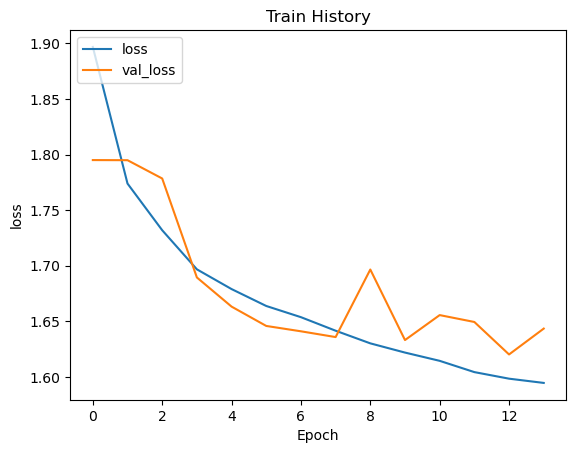

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

plt.title("Train History")
plt.ylabel("loss")
plt.xlabel("Epoch")

plt.legend(["loss", "val_loss"], loc = "upper left")
plt.show()

In [17]:
print('Test accuracy:', test_acc)

Test accuracy: 0.40549999475479126


### Test accuracy: 0.40549999475479126

#### The result of the test not change not much. And we set `epoches` to 7.

In [18]:
model = build_model()

# Train the model
history = model.fit(
    train_images, 
    train_labels, 
    epochs=7, 
    validation_data=(test_images, test_labels),
)
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

Epoch 1/7
1563/1563 [==============================] - 8s 4ms/step - loss: 1.9099 - accuracy: 0.2938 - val_loss: 1.7919 - val_accuracy: 0.3429
Epoch 2/7
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8080 - accuracy: 0.3426 - val_loss: 1.8029 - val_accuracy: 0.3418
Epoch 3/7
1563/1563 [==============================] - 7s 4ms/step - loss: 1.7693 - accuracy: 0.3596 - val_loss: 1.7662 - val_accuracy: 0.3570
Epoch 4/7
1563/1563 [==============================] - 7s 4ms/step - loss: 1.7361 - accuracy: 0.3740 - val_loss: 1.7603 - val_accuracy: 0.3669
Epoch 5/7
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7139 - accuracy: 0.3816 - val_loss: 1.7326 - val_accuracy: 0.3751
Epoch 6/7
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7058 - accuracy: 0.3868 - val_loss: 1.7016 - val_accuracy: 0.3842
Epoch 7/7
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6914 - accuracy: 0.3886 - val_loss: 1.6809 - val_accuracy: 0.3966

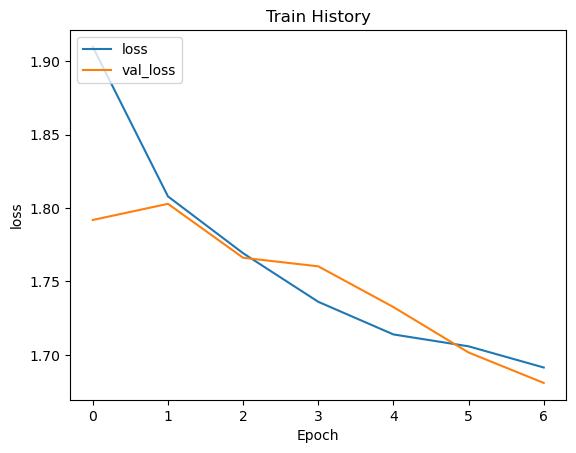

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

plt.title("Train History")
plt.ylabel("loss")
plt.xlabel("Epoch")

plt.legend(["loss", "val_loss"], loc = "upper left")
plt.show()

In [20]:
print('Test accuracy:', test_acc)

Test accuracy: 0.39660000801086426


We still pickup the `epoches` to 14.

#### The result of the test not change a lot!

Then we can try other variables to improve the result of our model.

### Now we add the `bastch_size`

In [21]:
model = build_model()

# Train the model
history = model.fit(
    train_images, 
    train_labels, 
    epochs=14, 
    validation_data=(test_images, test_labels),
    batch_size=100
)
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

Epoch 1/14
500/500 [==============================] - 4s 5ms/step - loss: 1.9264 - accuracy: 0.2947 - val_loss: 1.8083 - val_accuracy: 0.3484
Epoch 2/14
500/500 [==============================] - 2s 4ms/step - loss: 1.7778 - accuracy: 0.3587 - val_loss: 1.7299 - val_accuracy: 0.3800
Epoch 3/14
500/500 [==============================] - 2s 4ms/step - loss: 1.7275 - accuracy: 0.3777 - val_loss: 1.7120 - val_accuracy: 0.3769
Epoch 4/14
500/500 [==============================] - 2s 4ms/step - loss: 1.6970 - accuracy: 0.3880 - val_loss: 1.7150 - val_accuracy: 0.3717
Epoch 5/14
500/500 [==============================] - 2s 4ms/step - loss: 1.6784 - accuracy: 0.3941 - val_loss: 1.6784 - val_accuracy: 0.3968
Epoch 6/14
500/500 [==============================] - 2s 4ms/step - loss: 1.6587 - accuracy: 0.4014 - val_loss: 1.6515 - val_accuracy: 0.4062
Epoch 7/14
500/500 [==============================] - 2s 5ms/step - loss: 1.6463 - accuracy: 0.4052 - val_loss: 1.6560 - val_accuracy: 0.4004
Epoch 

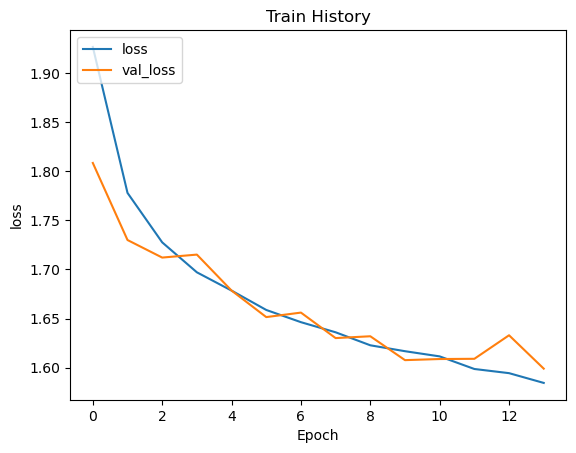

In [22]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

plt.title("Train History")
plt.ylabel("loss")
plt.xlabel("Epoch")

plt.legend(["loss", "val_loss"], loc = "upper left")
plt.show()

In [23]:
print('Test accuracy:', test_acc)

Test accuracy: 0.4260999858379364


#### The result of the test truly increases! Then we can find it may occur overfitting at `epoches 9` then we change the epoches


In [24]:
model = build_model()

# Train the model
history = model.fit(
    train_images, 
    train_labels, 
    epochs=9, 
    validation_data=(test_images, test_labels),
    batch_size=100
)
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

Epoch 1/9
500/500 [==============================] - 4s 5ms/step - loss: 1.9062 - accuracy: 0.3032 - val_loss: 1.7596 - val_accuracy: 0.3637
Epoch 2/9
500/500 [==============================] - 3s 5ms/step - loss: 1.7522 - accuracy: 0.3698 - val_loss: 1.6988 - val_accuracy: 0.3897
Epoch 3/9
500/500 [==============================] - 2s 4ms/step - loss: 1.7082 - accuracy: 0.3824 - val_loss: 1.6926 - val_accuracy: 0.3851
Epoch 4/9
500/500 [==============================] - 2s 4ms/step - loss: 1.6770 - accuracy: 0.3936 - val_loss: 1.6851 - val_accuracy: 0.3917
Epoch 5/9
500/500 [==============================] - 2s 4ms/step - loss: 1.6596 - accuracy: 0.4005 - val_loss: 1.6983 - val_accuracy: 0.3856
Epoch 6/9
500/500 [==============================] - 2s 4ms/step - loss: 1.6508 - accuracy: 0.4061 - val_loss: 1.6292 - val_accuracy: 0.4124
Epoch 7/9
500/500 [==============================] - 2s 4ms/step - loss: 1.6365 - accuracy: 0.4082 - val_loss: 1.6324 - val_accuracy: 0.4135
Epoch 8/9
500

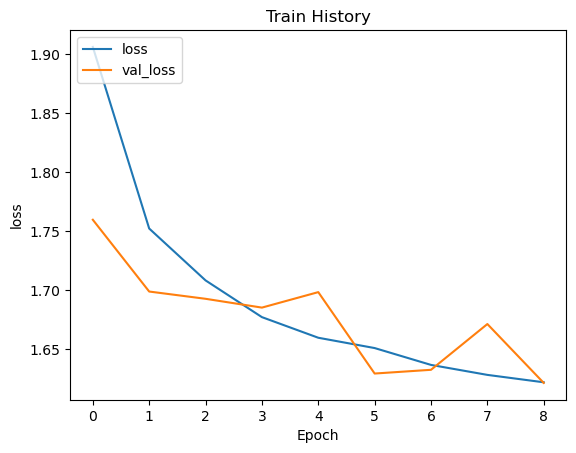

In [25]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

plt.title("Train History")
plt.ylabel("loss")
plt.xlabel("Epoch")

plt.legend(["loss", "val_loss"], loc = "upper left")
plt.show()

In [26]:
print('Test accuracy:', test_acc)

Test accuracy: 0.41040000319480896


#### However, the accuracy decrease, then we still set our `epoches` to 14. Now we try to increase the speed of training, we set the `batch_size` larger.

In [27]:
model = build_model()

# Train the model
history = model.fit(
    train_images, 
    train_labels, 
    epochs=9, 
    validation_data=(test_images, test_labels),
    batch_size=500
)
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

Epoch 1/9
100/100 [==============================] - 2s 12ms/step - loss: 2.0051 - accuracy: 0.2665 - val_loss: 1.8807 - val_accuracy: 0.3185
Epoch 2/9
100/100 [==============================] - 1s 6ms/step - loss: 1.8183 - accuracy: 0.3452 - val_loss: 1.7740 - val_accuracy: 0.3593
Epoch 3/9
100/100 [==============================] - 1s 7ms/step - loss: 1.7530 - accuracy: 0.3727 - val_loss: 1.7211 - val_accuracy: 0.3889
Epoch 4/9
100/100 [==============================] - 1s 7ms/step - loss: 1.7069 - accuracy: 0.3897 - val_loss: 1.7026 - val_accuracy: 0.3907
Epoch 5/9
100/100 [==============================] - 1s 7ms/step - loss: 1.6704 - accuracy: 0.4031 - val_loss: 1.6537 - val_accuracy: 0.4085
Epoch 6/9
100/100 [==============================] - 1s 8ms/step - loss: 1.6385 - accuracy: 0.4178 - val_loss: 1.6323 - val_accuracy: 0.4175
Epoch 7/9
100/100 [==============================] - 1s 8ms/step - loss: 1.6189 - accuracy: 0.4242 - val_loss: 1.5990 - val_accuracy: 0.4322
Epoch 8/9
10

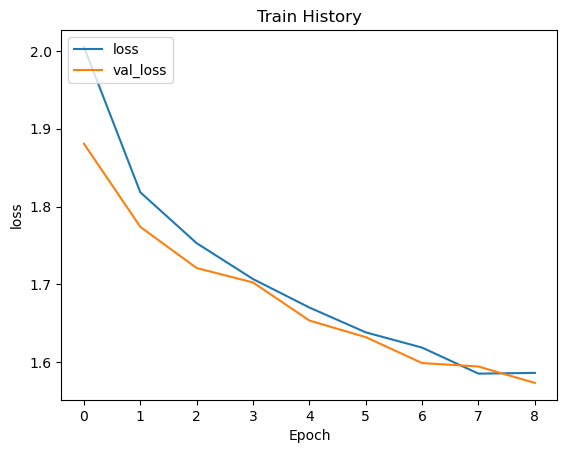

In [28]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

plt.title("Train History")
plt.ylabel("loss")
plt.xlabel("Epoch")

plt.legend(["loss", "val_loss"], loc = "upper left")
plt.show()

In [29]:
print('Test accuracy:', test_acc)

Test accuracy: 0.4408000111579895


#### We find that when we adjust our `batch_size` larger, we can also increase the result of our model!

### Test accuracy: 0.4408000111579895




Then we can try another test to change our `optimizer`.

In [ ]:
def build_model():
    
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(32, 32, 3)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10)
    ])

    model.compile(optimizer='rmsprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    
    return model

In [30]:
model = build_model()

# Train the model
history = model.fit(
    train_images, 
    train_labels, 
    epochs=14, 
    validation_data=(test_images, test_labels),
    batch_size=500
)
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

Epoch 1/14
100/100 [==============================] - 2s 11ms/step - loss: 2.0109 - accuracy: 0.2637 - val_loss: 1.8883 - val_accuracy: 0.3287
Epoch 2/14
100/100 [==============================] - 1s 7ms/step - loss: 1.8259 - accuracy: 0.3500 - val_loss: 1.7714 - val_accuracy: 0.3703
Epoch 3/14
100/100 [==============================] - 1s 6ms/step - loss: 1.7591 - accuracy: 0.3709 - val_loss: 1.7287 - val_accuracy: 0.3814
Epoch 4/14
100/100 [==============================] - 1s 7ms/step - loss: 1.7084 - accuracy: 0.3896 - val_loss: 1.6900 - val_accuracy: 0.4010
Epoch 5/14
100/100 [==============================] - 1s 7ms/step - loss: 1.6670 - accuracy: 0.4051 - val_loss: 1.6690 - val_accuracy: 0.4015
Epoch 6/14
100/100 [==============================] - 1s 7ms/step - loss: 1.6353 - accuracy: 0.4170 - val_loss: 1.6229 - val_accuracy: 0.4239
Epoch 7/14
100/100 [==============================] - 1s 6ms/step - loss: 1.6072 - accuracy: 0.4261 - val_loss: 1.6028 - val_accuracy: 0.4306
Epoch

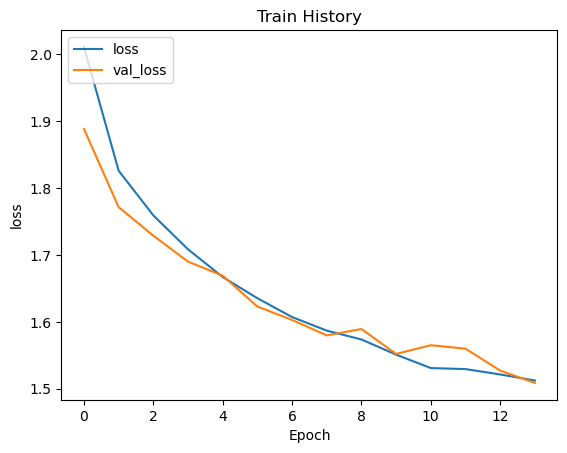

In [31]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

plt.title("Train History")
plt.ylabel("loss")
plt.xlabel("Epoch")

plt.legend(["loss", "val_loss"], loc = "upper left")
plt.show()

In [32]:
print('Test accuracy:', test_acc)

Test accuracy: 0.4668000042438507


### Test accuracy: 0.4668000042438507

And we found that the `val_loss` and `loss` more smoothly.

## My gained knowledge

I have tested a lot of experiment to improve the model; however, all of the results still surround to about forty percent accuracy. 

#### Below are the experiments I have conducted:
* `epoches: from 20 -> 14 -> 9 -> 14`.
* `batch_size: from 100 -> 500`.
* `optimizer: adam and rmsprop`.

Even though I designed a lot of experiments, the accuracy did not increase significantly. I have considered the reasons, and here are my conclusions. 

First, our Deep Neural-Network model was limited by the size of the CIFAR-10 dataset, which consisted of up to 50000 training_data and up to 10000 testing_data. The larger datasets made it difficult for the DNN model to capture all the necessary values during training, which resulted in less accuracy even when we changed several variables. 

Second, given the large amount of data, I could have tried to drop out the data that affected the results. However, I thought that we might be able to choose the Convolutional Neural-Network instead because it was more suitable for dropping out the worse neural in our model.

In conclusion, I am excited to have the opportunity to improve my deep-learning skills with this dataset and to review what I have learned before.

### Reference

* [Day 20 ~ AI從入門到放棄 - 新的資料集](https://ithelp.ithome.com.tw/articles/10248873)
* [簡單使用keras 架構深度學習神經網路 — 以cifar10為例](https://medium.com/@a227799770055/%E7%B0%A1%E5%96%AE%E4%BD%BF%E7%94%A8keras-%E6%9E%B6%E6%A7%8B%E6%B7%B1%E5%BA%A6%E5%AD%B8%E7%BF%92%E7%A5%9E%E7%B6%93%E7%B6%B2%E8%B7%AF-%E4%BB%A5cifar10%E7%82%BA%E4%BE%8B-b8921ca239cf)